<a href="https://colab.research.google.com/github/IDBach16/Moeller_2024/blob/main/Moeller_python_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moeller 2024 Analysis

In [2]:
#Ongoing Moeller Code
import pandas as pd #import Pandas
import matplotlib.pyplot as plt #import matplotlib.pyplot for visualizations
import os #import directory
import seaborn as sns #import seaborn
import matplotlib.ticker as ticker # import matplotlib ticker
df = pd.read_csv('drive/My Drive/Moeller/Moeller_2024_Season.csv') #Creation of dataframe df
df # print

,PitchNo,Date,Time,PAofInning,PAofInning.1,Pitcher,PitcherHand,PitcherTeam,Batter,Batter Hand,...,Top/Bottom,Outs,Balls,Strikes,PitchType,PitchResult,AtBatResult,PitchVelo,Location,AttackZone
0,1,3/23/24,4:11:09 PM,1,1,Zion Theophilus,R,Moeller,Faris Thabata,R,...,Top,0,0,0,Fast Ball,Strike Looking,NaN,91.0,13.0,Shadow
1,2,3/23/24,4:11:23 PM,2,2,Zion Theophilus,R,Moeller,Faris Thabata,R,...,Top,0,0,1,Fast Ball,Strike In Play,Ground Out,91.0,11.0,Shadow
2,3,3/23/24,4:11:49 PM,3,1,Zion Theophilus,R,Moeller,Brett Kappel,R,...,Top,1,0,0,Fast Ball,Ball,NaN,91.0,13.0,Shadow
3,4,3/23/24,4:12:05 PM,4,2,Zion Theophilus,R,Moeller,Brett Kappel,R,...,Top,1,1,0,Fast Ball,Strike Looking,NaN,90.0,5.0,Heart
4,5,3/23/24,4:12:21 PM,5,3,Zion Theophilus,R,Moeller,Brett Kappel,R,...,Top,1,1,1,Fast Ball,Strike Swing and Miss,NaN,87.0,12.0,Shadow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,192,3/30/24,3:07:18 PM,18,1,Sam Scuglik,R,Moeller,Alex Proano-Raps,R,...,Top,2,0,0,Fast Ball,Strike Looking,NaN,83.0,13.0,Shadow
954,193,3/30/24,3:07:33 PM,19,2,Sam Scuglik,R,Moeller,Alex Proano-Raps,R,...,Top,2,0,1,Fast Ball,Ball,NaN,83.0,29.0,Chase
955,194,3/30/24,3:07:48 PM,20,3,Sam Scuglik,R,Moeller,Alex Proano-Raps,R,...,Top,2,1,1,Fast Ball,Ball,NaN,82.0,31.0,Waste
956,195,3/30/24,3:08:06 PM,21,4,Sam Scuglik,R,Moeller,Alex Proano-Raps,R,...,Top,2,2,1,Fast Ball,Strike Swing and Miss,NaN,83.0,13.0,Shadow


# Analysis of 'Strike Looking' Incidence for Moeller Batters with Specific Count and Strike Scenario


In [3]:
# Filter the original dataframe to include only rows where the batter has 1 ball, 1 strike, and is from the 'Moeller' team
filtered_df = df[(df['Balls'] == 1) & (df['Strikes'] == 0) & (df['BatterTeam'] == 'Moeller')]
# Count the number of pitches that resulted in a 'Strike Looking' from the filtered dataframe
strike_looking_count = filtered_df[filtered_df['PitchResult'] == 'Strike Looking'].shape[0]
# Count the total number of entries in the filtered dataframe
total_count = filtered_df.shape[0]
#Create percentage looking equation
percentage_strike_looking = (strike_looking_count / total_count) * 100
#filtered dataframe
filtered_df.shape

(62, 22)

#  Calculation of Specific Pitch and At-Bat Outcomes in Filtered Data


In [4]:
#Create Strike Swinging count by filtering Pitch Results = is Swing and Miss
strike_swinging_count = filtered_df[filtered_df['PitchResult'] == 'Strike Swing and Miss'].shape[0]
#Filtered counnt for pitch result to strike foul
strike_foul_count = filtered_df[filtered_df['PitchResult'] == 'Strike Foul'].shape[0]
#Filtered count for pitch result to strike in play
strike_inplay_count = filtered_df[filtered_df['PitchResult'] == 'Strike In Play'].shape[0]
#Filtered  pitch result as Ball
ball_count = filtered_df[filtered_df['PitchResult'] == 'Ball'].shape[0]
#Filtered  pitch AtBatResult as 1B, 2B, 3B, HR
hit_count = filtered_df[filtered_df['AtBatResult'].isin(['1B', '2B', '3B', 'HR'])].shape[0]

# Calculation of Pitch Outcome Percentages from Total Pitch Counts


In [5]:
#Creation of Percentage Strike Swinging
percentage_strike_swinging = (strike_swinging_count / total_count) * 100
#Creation of Percentage Strike Foul
percentage_strike_foul = (strike_foul_count / total_count) * 100
#Creation of strike in Play percentage
percentage_strike_inplay = (strike_inplay_count / total_count) * 100
#Percentage of Balls
percentage_ball = (ball_count / total_count) * 100
#Percentage of Hits
percentage_hit = (hit_count / total_count) * 100

# Visualization of Pitch Outcome Percentages in a 1-0 Count for the 2024 Season


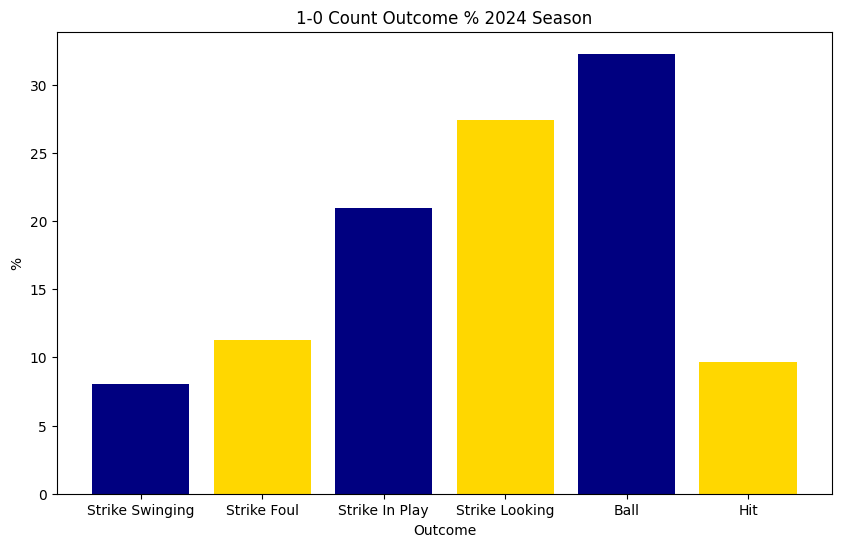

In [7]:
categories = ['Strike Swinging', 'Strike Foul', 'Strike In Play', 'Strike Looking', 'Ball', 'Hit']
count = [percentage_strike_swinging, percentage_strike_foul, percentage_strike_inplay, percentage_strike_looking, percentage_ball, percentage_hit]

#Creation of Bar Graph
plt.figure(figsize=(10,6)) #Outline of Figure
plt.bar(categories, count, color=['navy', 'gold', 'navy', 'gold', 'navy', 'gold']) #Creation of Bar plot
plt.xlabel('Outcome') #x axis label
plt.ylabel('%') #y axis label
plt.title('1-0 Count Outcome % 2024 Season') ##title of Graphs
plt.show() #print

# Creation of DF and Visualization to create Pitch Result % for Moeller Pitchers

In [8]:
# Extracts the unique values from the 'PitchResult' column of the dataframe to see all possible outcomes.
df['PitchResult'].unique()
#Creation of Strike events
strike_events = ['Strike Looking', 'Strike Swing and Miss', 'Strike Foul']
df['is_strike'] = 0
# Set the 'is_strike' column to 1 for all rows where the 'PitchResult' is in the list of strike_events, indicating a strike.
df.loc[df['PitchResult'].isin(strike_events), 'is_strike'] = 1
# Initialize a new column 'is_moeller_pitcher' with 0. Then set this column to 1 for rows
#where the 'PitcherTeam' is 'Moeller', indicating the pitcher is from Moeller team.
df['is_moeller_pitcher'] = 0
df.loc[(df['PitcherTeam']=='Moeller'), 'is_moeller_pitcher'] = 1

df1 = df.loc[df['is_moeller_pitcher']==1, ['Pitcher', 'PitchType', 'is_strike']].groupby(['Pitcher', 'PitchType'], as_index=False).mean()
#Rename columns to Strike%
df1 = df1.rename(columns={'is_strike':'Strike%'}).round(2)
# Create a new dataframe 'df2' that counts occurrences of each pitch type for Moeller pitchers, grouped by pitcher name and pitch type.
df2 = df.loc[df['is_moeller_pitcher']==1, ['Pitcher', 'PitchType', 'is_strike']].groupby(['Pitcher', 'PitchType'], as_index=False).count()
#Rename columns to Count
df2 = df2.rename(columns={'is_strike':'Count'})
#Mertge Pitcher and PitchType
df3 = df1.merge(df2, on=['Pitcher', 'PitchType'])
#print dataframe
df3

,Pitcher,PitchType,Strike%,Count
0,Connor Fuhrer,Change Up,0.43,7
1,Connor Fuhrer,Fast Ball,0.47,59
2,Connor Fuhrer,Not Tracked,0.00,5
3,Connor Fuhrer,Slider,0.42,38
4,David Hagen,Change Up,0.50,14
5,David Hagen,Fast Ball,0.49,41
6,David Hagen,Slider,0.55,20
7,Finn O'Keefe,Change Up,0.22,9
8,Finn O'Keefe,Fast Ball,0.33,21
9,Sam Scuglik,Change Up,0.39,18


# Generation of Individual Bar Plots for Strike Percentages by Pitch Type for Each Pitcher


Connor Fuhrer


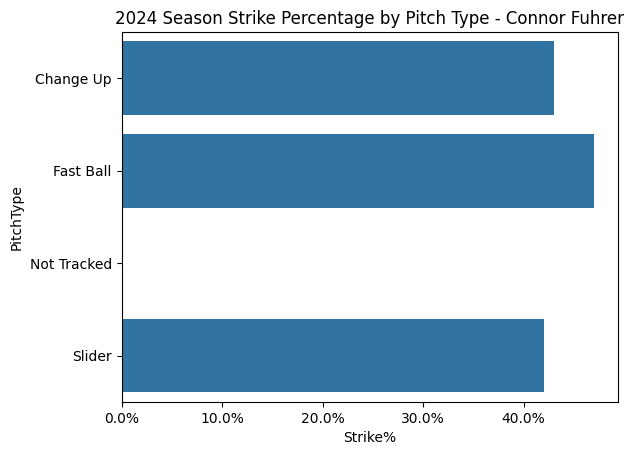

David Hagen


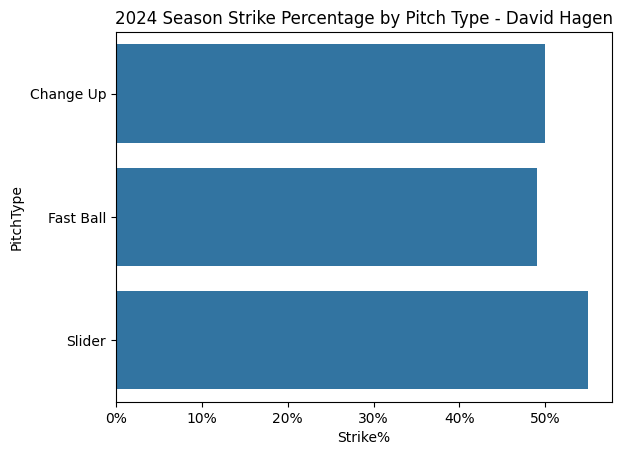

Finn O'Keefe


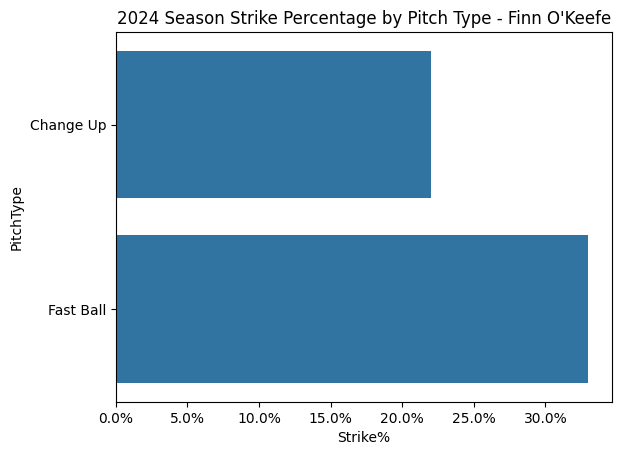

Sam Scuglik


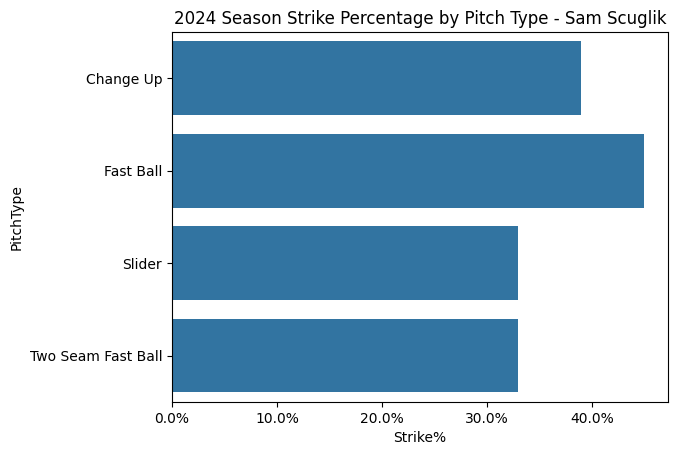

Tyler Heflin


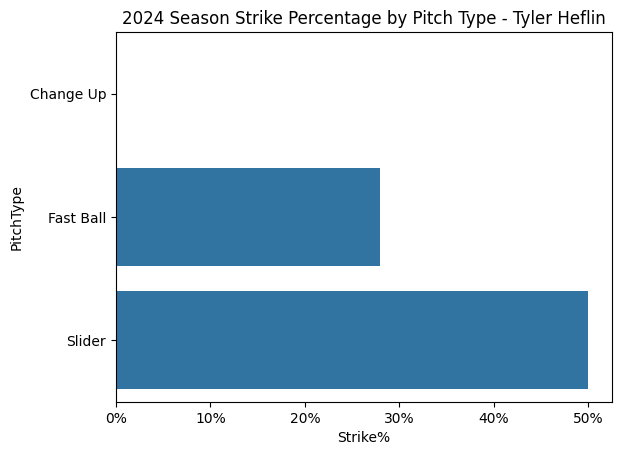

Zion Theophilus


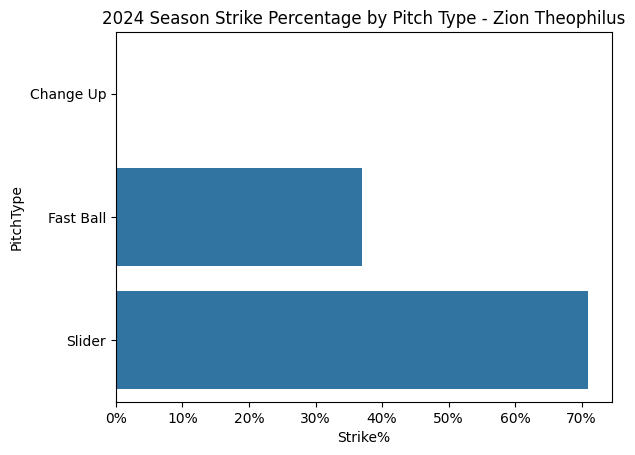

In [15]:
# Loop through each unique pitcher in 'df3'. Print the pitcher's name and create a subset dataframe 'df_plt' for each pitcher's data.
for pitcher in df3['Pitcher'].unique():
  print(pitcher)
# Create a data frame 'df_plt' containing data for the current pitcher in the loop
  df_plt = df3.loc[df3['Pitcher']==pitcher]
#create barplot
  sns.barplot(data=df_plt, x='Strike%', y='PitchType')
# Set the major formatter of the x-axis to display values as percentages, assuming the values are given as fractions of 1.
  ax = plt.gca()
  ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
#title of the plot
  plt.title('2024 Season Strike Percentage by Pitch Type - ' + pitcher)
#print
  plt.show()



# Faceted Bar Chart Visualization of Strike Percentages by Pitch Type for Each Pitcher


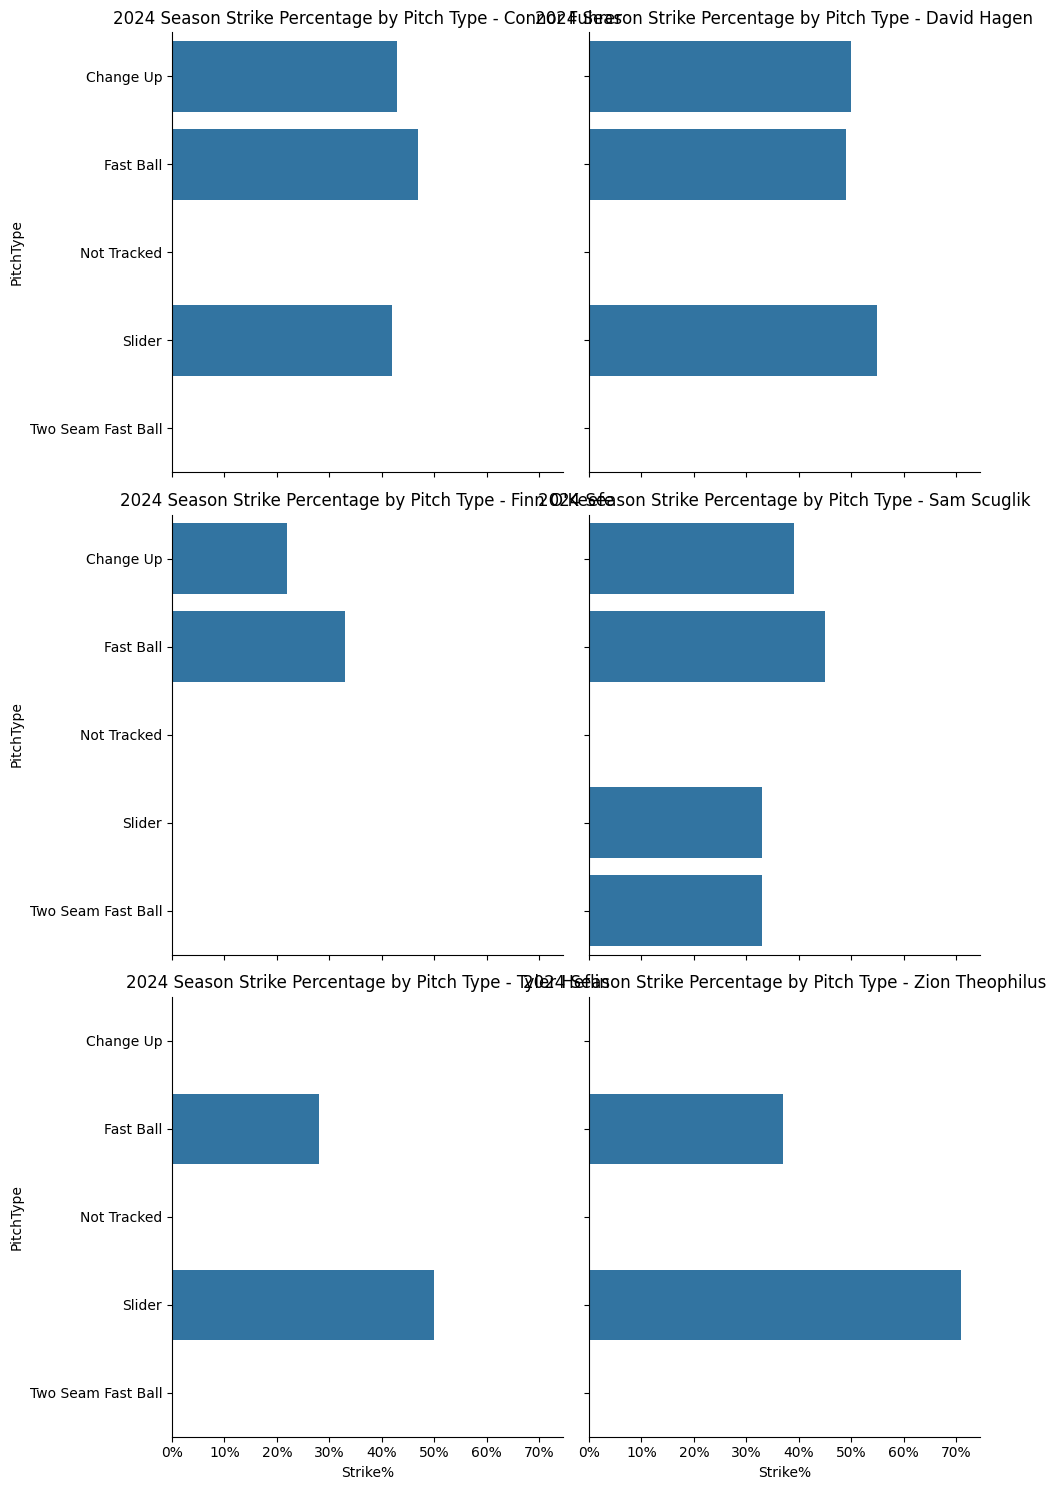

In [14]:
# Create a FacetGrid
g = sns.FacetGrid(df3, col='Pitcher', col_wrap=2, height=5, aspect=1)
g.map_dataframe(sns.barplot, x='Strike%', y='PitchType')

# Set the formatter for all axes in the FacetGrid
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    # Set the title for each facet based on the pitcher's name
    if hasattr(ax, 'get_title') and ax.get_title():
        pitcher_name = ax.get_title().split(' = ')[-1]
        ax.set_title(f'2024 Season Strike Percentage by Pitch Type - {pitcher_name}')

# Adjust the layout and render the plot
plt.tight_layout()
plt.show()

# Creation of a new DF called Offspeed:

In [20]:
#Organize pitch type data to equal 'Change Up', 'Breaking Ball' for Moeller Hitters
offspeed = df[(df['PitchType'].isin(['Change Up', 'Breaking Ball'])) & (df['BatterTeam'] == 'Moeller')]
#print offspeed for Hitters
offspeed.head()


,PitchNo,Date,Time,PAofInning,PAofInning.1,Pitcher,PitcherHand,PitcherTeam,Batter,Batter Hand,...,Strikes,PitchType,PitchResult,AtBatResult,PitchVelo,Location,AttackZone,is_strike,is_moeller_pitcher,is_moeller_hitter
11,12,3/23/24,4:17:08 PM,2,2,Austin Payne,R,Strongsville High School,Will McCullough,R,...,1,Breaking Ball,Ball,NaN,68.0,22.0,Chase,0,0,1
12,13,3/23/24,4:17:25 PM,3,3,Austin Payne,R,Strongsville High School,Will McCullough,R,...,1,Breaking Ball,Ball,NaN,69.0,39.0,Waste,0,0,1
19,20,3/23/24,4:20:18 PM,10,4,Austin Payne,R,Strongsville High School,Charlie Valencic,R,...,2,Change Up,Strike In Play,Ground Out,70.0,19.0,Shadow,0,0,1
26,27,3/23/24,4:22:56 PM,17,1,Austin Payne,R,Strongsville High School,Carter Christenson,R,...,0,Breaking Ball,Ball,NaN,68.0,11.0,Shadow,0,0,1
51,52,3/23/24,4:33:16 PM,4,4,Austin Payne,R,Strongsville High School,Cooper Ridley,L,...,2,Breaking Ball,Strike Swing and Miss,Strike Out,78.0,19.0,Shadow,1,0,1


# Counting Specific Pitch Outcomes for Offspeed Pitches


In [21]:
#Count on Strike Swing and Miss
offstrike_swinging_count = offspeed[offspeed['PitchResult'] == 'Strike Swing and Miss'].shape[0]
#Count on Strike Looking
offstrike_looking_count = offspeed[offspeed['PitchResult'] == 'Strike Looking'].shape[0]
#Count on strike foul
offstrike_foul_count = offspeed[offspeed['PitchResult'] == 'Strike Foul'].shape[0]
#Count on Strike in play
offstrike_inplay_count = offspeed[offspeed['PitchResult'] == 'Strike In Play'].shape[0]
#Count on Ball
offball_count = offspeed[offspeed['PitchResult'] == 'Ball'].shape[0]
#Count on results 1B, 2B, 3B, and HR
offhit_count = offspeed[offspeed['AtBatResult'].isin(['1B', '2B', '3B', 'HR'])].shape[0]
#Count of offspeed
offtotal_count = offspeed.shape[0]

# Calculation of Pitch Outcome Percentages for Offspeed Pitches


In [22]:
#Strike swinging percentage
offpercentage_strike_swinging = (offstrike_swinging_count / offtotal_count) * 100
#Strike looking percentage
offpercentage_strike_looking = (offstrike_looking_count / offtotal_count) * 100
#Strike Foul percentage
offpercentage_strike_foul = (offstrike_foul_count / offtotal_count) * 100
#Strike in play percentage
offpercentage_strike_inplay = (offstrike_inplay_count / offtotal_count) * 100
#Offspeed percentage ball
offpercentage_ball = (offball_count / offtotal_count) * 100
#Offspeed percentage hit
offpercentage_hit = (offhit_count / offtotal_count) * 100

# Visualization of Pitch Outcomes for Moeller Hitters in the 2024 Season


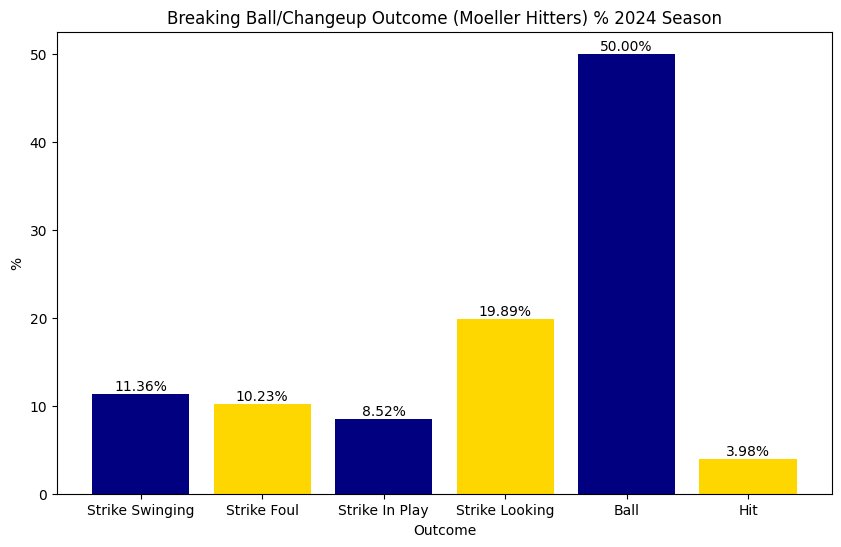

In [23]:
# Define the categories and counts
categories = ['Strike Swinging', 'Strike Foul', 'Strike In Play', 'Strike Looking', 'Ball', 'Hit']
counts = [offpercentage_strike_swinging, offpercentage_strike_foul, offpercentage_strike_inplay, offpercentage_strike_looking, offpercentage_ball, offpercentage_hit]
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['navy', 'gold', 'navy', 'gold', 'navy', 'gold'])
# Add text labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
# Set labels and title
plt.xlabel('Outcome')
plt.ylabel('%')
plt.title('Breaking Ball/Changeup Outcome (Moeller Hitters) % 2024 Season')
# Show the plot
plt.show()


# Analysis of Pitcher Attack Zone Effectiveness and Frequency for Moeller Pitchers


In [ ]:
#Creation of DF to Mean Attack Zone
df4 = df.loc[df['is_moeller_pitcher']==1, ['Pitcher', 'AttackZone', 'is_strike']].groupby(['Pitcher', 'AttackZone'], as_index=False).mean()
#Rename to DF to Strike %
df4 = df4.rename(columns={'is_strike':'Strike%'}).round(2)
#Creation of DF to Count Attack Zone
df5 = df.loc[df['is_moeller_pitcher']==1, ['Pitcher', 'AttackZone', 'is_strike']].groupby(['Pitcher', 'AttackZone'], as_index=False).count()
#Rename to DF to Count
df5 = df5.rename(columns={'is_strike':'Count'})
#Merge DF4 with DF5 to create df_attack
df_attack = df4.merge(df5, on=['Pitcher', 'AttackZone'])
#print
df_attack

# Faceted Visualization of Strike Percentages by Attack Zone for Each Pitcher


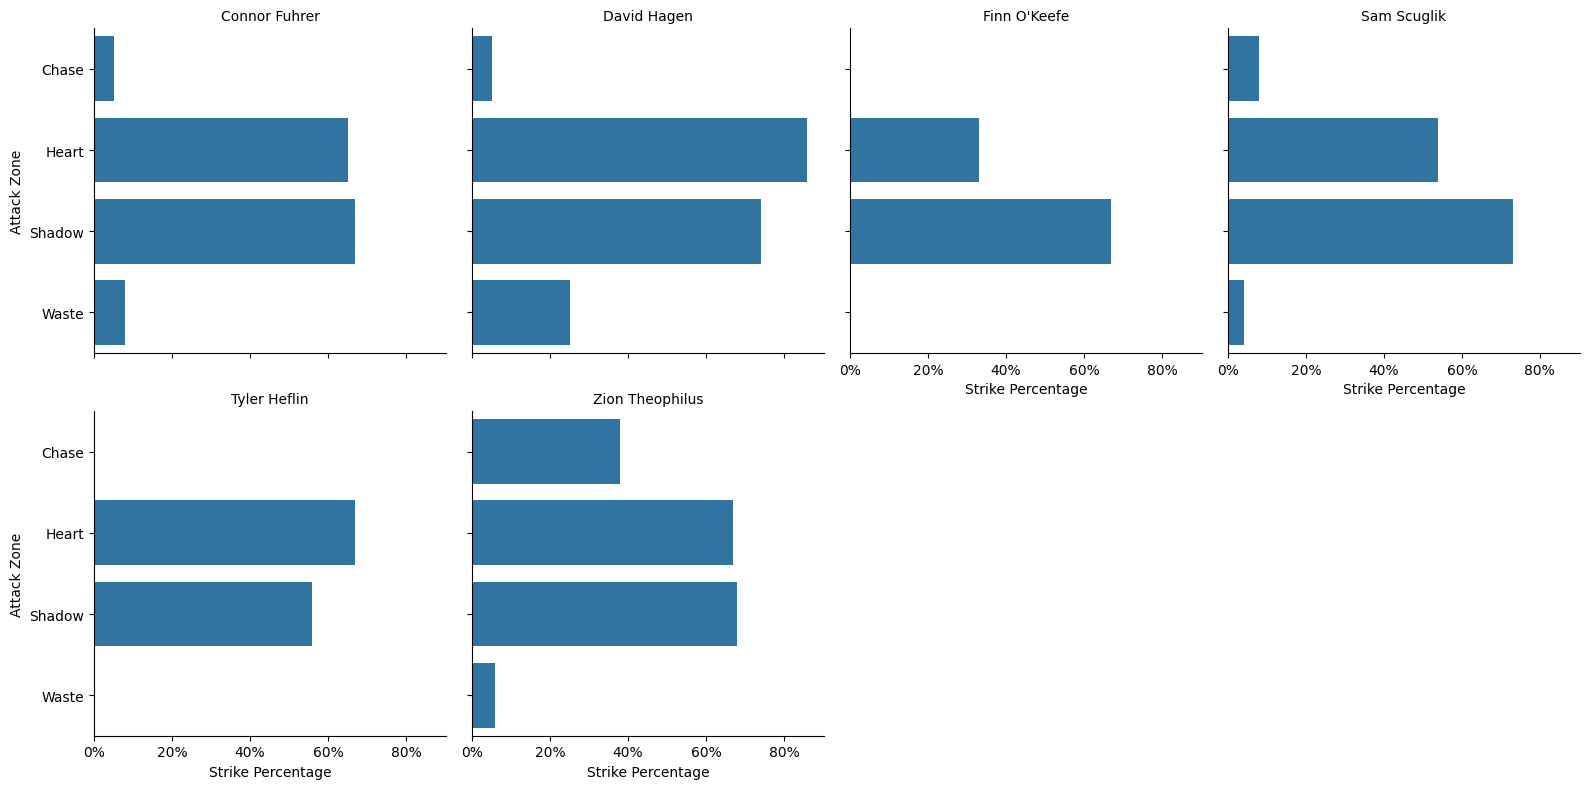

In [26]:
# Create the FacetGrid object, specifying the size and aspect of each subplot
g = sns.FacetGrid(df_attack, col="Pitcher", col_wrap=4, height=4, aspect=1)
#Create of barplot with map_dataframe
g.map_dataframe(sns.barplot, x='Strike%', y='AttackZone', orient='h')

# Iterate over each axis to customize (create a for loop to create for a custom axis )
for ax, pitcher in zip(g.axes.flat, df_attack['Pitcher'].unique()):
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))  # Convert x-axis into percentage format
    ax.set_title('2024 Season Strike Percentage by Attack Zone - ' + pitcher)

# Adjust the layout and display the plot
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Strike Percentage", "Attack Zone")
plt.tight_layout()
plt.show()


 # Analysis of Pitch Results for Moeller Team Batters Against Left-Handed Pitchers

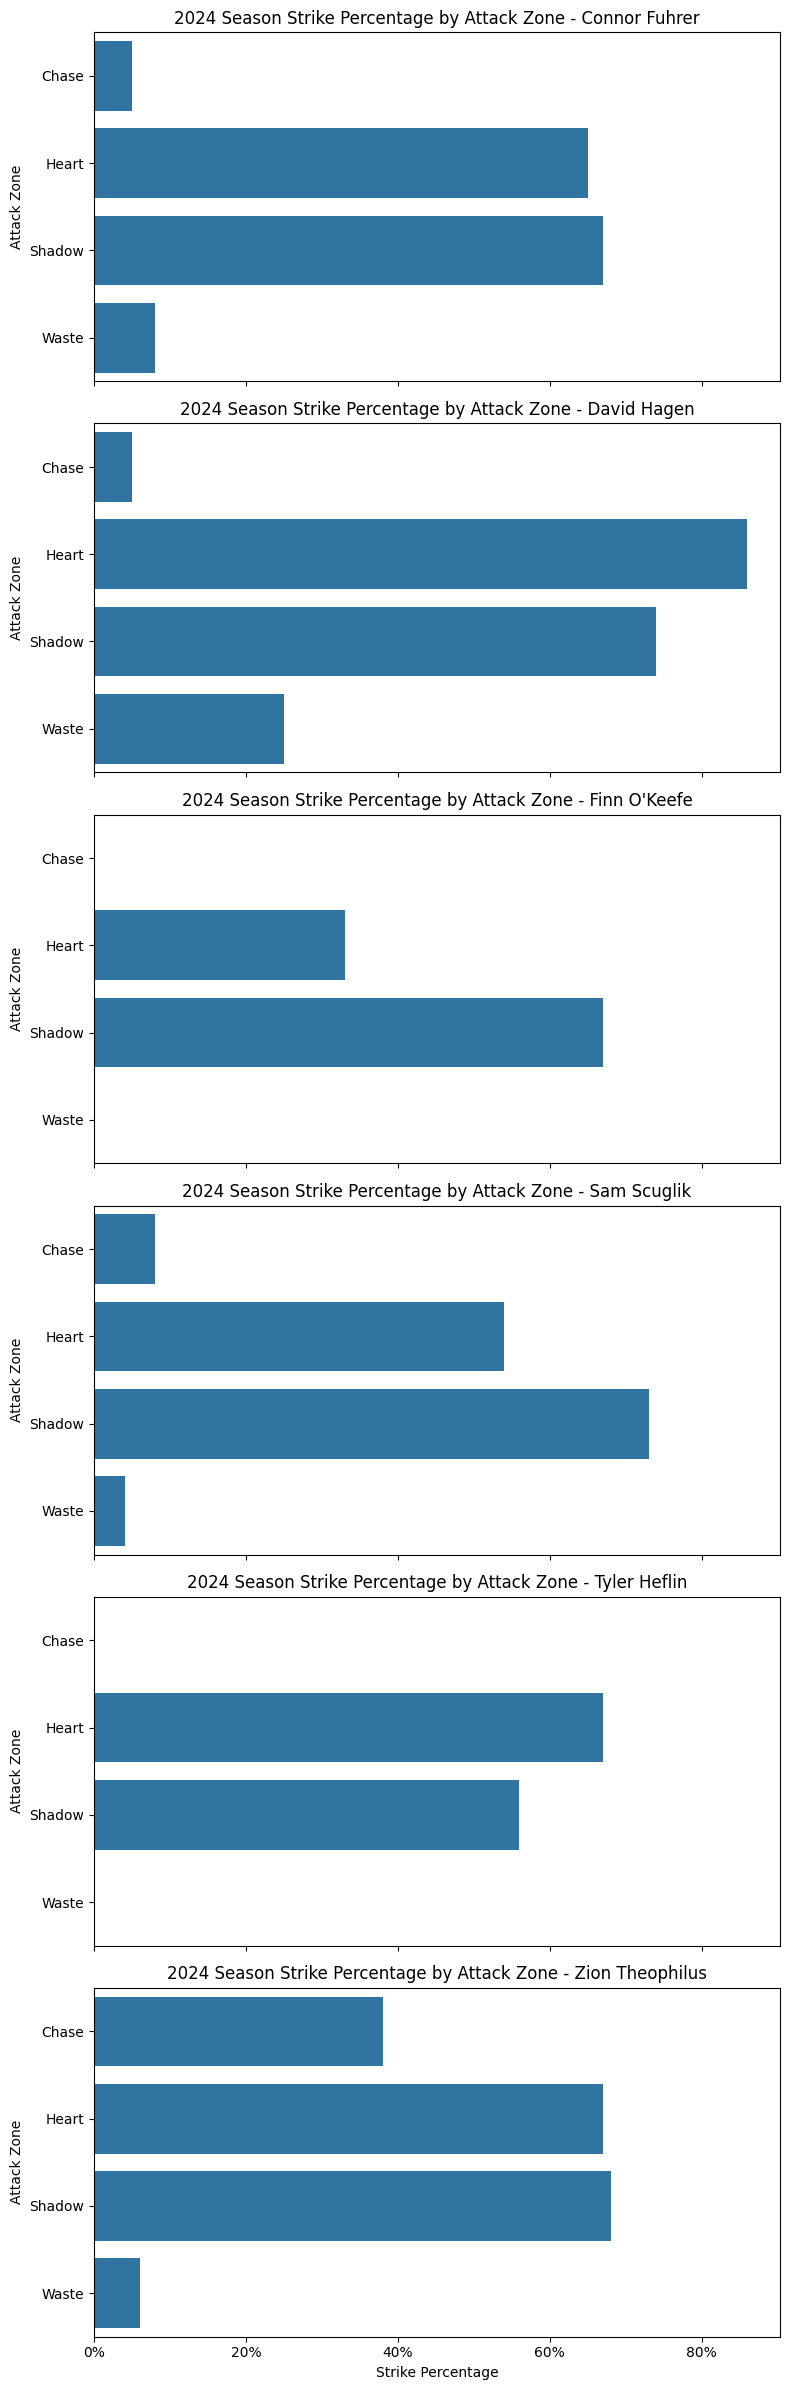

In [32]:
# Get unique pitchers
pitchers = df_attack['Pitcher'].unique()
n_pitchers = len(pitchers)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_pitchers, ncols=1, figsize=(8, 4 * n_pitchers), sharex=True)

 # Iterate over each subplot and corresponding pitcher to create horizontal bar plots displaying strike percentages by attack zone.
for ax, pitcher in zip(axes, pitchers):
    df_plt = df_attack[df_attack['Pitcher'] == pitcher]
    # Set each subplot's axis labels and title to reflect the specific data for each pitcher.
    sns.barplot(data=df_plt, x='Strike%', y='AttackZone', ax=ax, orient='h')
    # Adjust the layout for optimal display and render the combined plots.
    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))  # Convert x-axis into percentage format
    ax.set_title('2024 Season Strike Percentage by Attack Zone - ' + pitcher)
    ax.set_ylabel('Attack Zone')
    ax.set_xlabel('Strike Percentage')

plt.tight_layout()
plt.show()


# Comprehensive Analysis of Pitch Results for Moeller Batters Against Left-Handed Pitchers


In [28]:
# Initialize a new column 'is_moeller_hitter' in the dataframe 'df' and set its default value to 0.
df['is_moeller_hitter'] = 0
# Update this column to 1 for rows where the 'BatterTeam' is 'Moeller' to indicate that the batter belongs to
df.loc[(df['BatterTeam']=='Moeller'), 'is_moeller_hitter'] = 1
# Retrieve and display the unique values from the 'PitchResult' column of the dataframe 'df' to understand the different types of pitch results recorded.
df['PitchResult'].unique()
# Filter 'df' to select rows where the batter is from the Moeller team, the pitcher is left-handed, and the pitch result is 'Strike Looking'.
# Select only 'Batter' and 'PitchResult' columns, then group by 'Batter' to count occurrences, resetting the index to maintain 'Batter' as a column.
df6 = df.loc[(df['is_moeller_hitter'] == 1) & (df['PitcherHand'] == 'L') & (df['PitchResult'] == 'Strike Looking'), ['Batter', 'PitchResult']].groupby(['Batter'], as_index=False).count()
# Rename the 'PitchResult' column in the resulting dataframe 'df6' to 'Strike Looking' to reflect the specific count of such pitch results for each batter.
df6 = df6.rename(columns={'PitchResult': 'Strike Looking'})
# Filter 'df' to select rows where the batter is from the Moeller team, the pitcher is left-handed, and the pitch result is 'Strike In Play'.
# Select only 'Batter' and 'PitchResult' columns, then group by 'Batter' to count occurrences, resetting the index to maintain 'Batter' as a column.
df7 = df.loc[(df['is_moeller_hitter'] == 1) & (df['PitcherHand'] == 'L') & (df['PitchResult'] == 'Strike In Play'), ['Batter', 'PitchResult']].groupby(['Batter'], as_index=False).count()
# Rename the 'PitchResult' column in the resulting dataframe 'df6' to 'Strike In Play' to reflect the specific count of such pitch results for each batter.
df7 = df7.rename(columns={'PitchResult': 'Strike In Play'})
# Filter 'df' to select rows where the batter is from the Moeller team, the pitcher is left-handed, and the pitch result is 'Ball'.
# Select only 'Batter' and 'PitchResult' columns, then group by 'Batter' to count occurrences, resetting the index to maintain 'Batter' as a column.
df8 = df.loc[(df['is_moeller_hitter'] == 1) & (df['PitcherHand'] == 'L') & (df['PitchResult'] == 'Ball'), ['Batter', 'PitchResult']].groupby(['Batter'], as_index=False).count()
# Rename the 'PitchResult' column in the resulting dataframe 'df6' to 'Ball' to reflect the specific count of such pitch results for each batter.
df8 = df8.rename(columns={'PitchResult': 'Ball'})
# Filter 'df' to select rows where the batter is from the Moeller team, the pitcher is left-handed, and the pitch result is 'Strike Swing and Miss'.
# Select only 'Batter' and 'PitchResult' columns, then group by 'Batter' to count occurrences, resetting the index to maintain 'Batter' as a column.
df9 = df.loc[(df['is_moeller_hitter'] == 1) & (df['PitcherHand'] == 'L') & (df['PitchResult'] == 'Strike Swing and Miss'), ['Batter', 'PitchResult']].groupby(['Batter'], as_index=False).count()
# Rename the 'PitchResult' column in the resulting dataframe 'df6' to 'Whiff' to reflect the specific count of such pitch results for each batter.
df9 = df9.rename(columns={'PitchResult': 'Whiff'})
# Filter 'df' to select rows where the batter is from the Moeller team, the pitcher is left-handed, and the pitch result is 'Strike Fout'.
# Select only 'Batter' and 'PitchResult' columns, then group by 'Batter' to count occurrences, resetting the index to maintain 'Batter' as a column.
df10 = df.loc[(df['is_moeller_hitter'] == 1) & (df['PitcherHand'] == 'L') & (df['PitchResult'] == 'Strike Foul'), ['Batter', 'PitchResult']].groupby(['Batter'], as_index=False).count()
# Rename the 'PitchResult' column in the resulting dataframe 'df6' to 'Foul' to reflect the specific count of such pitch results for each batter.
df10 = df10.rename(columns={'PitchResult': 'Foul'})

# Merge multiple dataframes (df6, df7, df8, df9) into a single dataframe 'ge' and 'merge' sequentially, using 'Batter' as the key column.
merge = pd.merge(df6, df7, on='Batter', how='left')
merge = pd.merge(merge, df8, on='Batter', how='left')
merge = pd.merge(merge, df9, on='Batter', how='left')
# Each merge operation uses a 'left' join, ensuring all rows from the left dataframe are included and matched with rows from the right dataframe based on the 'Batter' column.
lhpbatting = pd.merge(merge, df10, on='Batter', how='left')


#Print
lhpbatting

,Batter,Strike Looking,Strike In Play,Ball,Whiff,Foul
0,Carter Christenson,5,2.0,6,NaN,1.0
1,Charlie Valencic,1,3.0,2,NaN,NaN
2,Cooper Ridley,1,1.0,5,2.0,NaN
3,Griffin Booth,1,NaN,3,1.0,2.0
4,Hanleigh Lopez,3,1.0,6,1.0,3.0
5,Kaden Snodgrass,1,1.0,3,NaN,1.0
6,Luke Pappano,4,NaN,6,3.0,3.0
7,Matt Ponatoski,3,2.0,4,1.0,1.0
8,Will McCullough,5,1.0,8,3.0,2.0
